In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import sqlite3
import os
print(os.getcwd())
os.chdir('./../')
print(os.getcwd())
import matplotlib.pyplot as plt

c:\Users\ghost\OneDrive\PC_Casa\Ciencia_Datos_IA\2024-2025\2n Cuatri\Introducción a la Ciencia de Datos\Actividades\Portfolio\Practica2\enunciados
c:\Users\ghost\OneDrive\PC_Casa\Ciencia_Datos_IA\2024-2025\2n Cuatri\Introducción a la Ciencia de Datos\Actividades\Portfolio\Practica2


# La visualización

¿Cuál es el objetivo de visualizar datos?

- [Sorolla](https://es.wikipedia.org/wiki/El_regreso_de_la_pesca:_remolcando_el_barco)
- [Juan Gris](https://www.museoreinasofia.es/en/collection/artwork/guitare-guitar)

La representación para conocer el mundo

- [Ptolomeo](https://blogcatedranaval.com/2017/12/01/los-mares-en-la-cosmografia-de-ptolomeo/)

Entendimiento del problema con visualización

- [John Snow](https://www.bbc.com/mundo/noticias-53328313)
- [Mapa Cólera](https://www.scielo.cl/scielo.php?pid=S0716-10182007000400014&script=sci_arttext)

Visualizaciones avanzadas y adaptadas a un problema:

- [Campaña Rusa de Napoleón](https://raona.com/que-tienen-comun-napoleon-y-visualizacion-de-datos/)

## Objetivo de la visualización

1. Aglutinar todo conocimiento para representarlo de la forma más sencilla posible.
2. Derivar comlejidad en simplicidad.

EJEMPLOS: zen de python

In [3]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


## Errores de visualización
- Uso de colores [Ejemplo UNESCO](https://www.unesco.org/en/heratlas)
- Usar un gráfico circular (pie chart) con demasiadas categorías [Tarta](https://medium.com/@Infogram/the-dos-and-donts-of-pie-charts-a21a57437cab)
- Usar un gráfico de líneas para datos categóricos, para comparar valores entre diferentes categorías no secuenciales, usa un gráfico de barras.
- [Catálogo de buenas visualizaciones con ejemplos](https://datavizcatalogue.com/index.html)
- Usar demasiados colores
- Usar colores no intuitivos o culturalmente inapropiados
- No considerar el daltonismo

# Matplotlib

## Representacion grafica
- Librería estándar de representación gráfica
- Low level: fácil de usar, difícil de dominar
- Gráficos y diagramas
- matplotlib basico (plot, legend, decoradores y anotaciones, grabar)
- dibujo con pandas (tipos de graficos)
- Intro a seaborn https://seaborn.pydata.org/tutorial.html

## Referencias
- https://plotdb.com/
- https://d3js.org/
- https://plot.ly/python/
- https://bokeh.org/
- https://shiny.rstudio.com/gallery/
- https://www.tableau.com/es-es
- https://powerbi.microsoft.com

## Auto EDA
- https://pypi.org/project/pandas-profiling/
- https://pypi.org/project/dtale/

## Elementos de visualización
- Figura. Marco donde se representan de manera conjunta una visualización. Se caracterizan por tener un título general y suele tener una descripción así como una fuente o referencia
- Subfigura. Representación dentro de una figura.
- Gráfico. Tipo de representación dentro de una subfigura o figura. Existen gran cantidad de tipos de gráficos: barras, líneas, tarta...

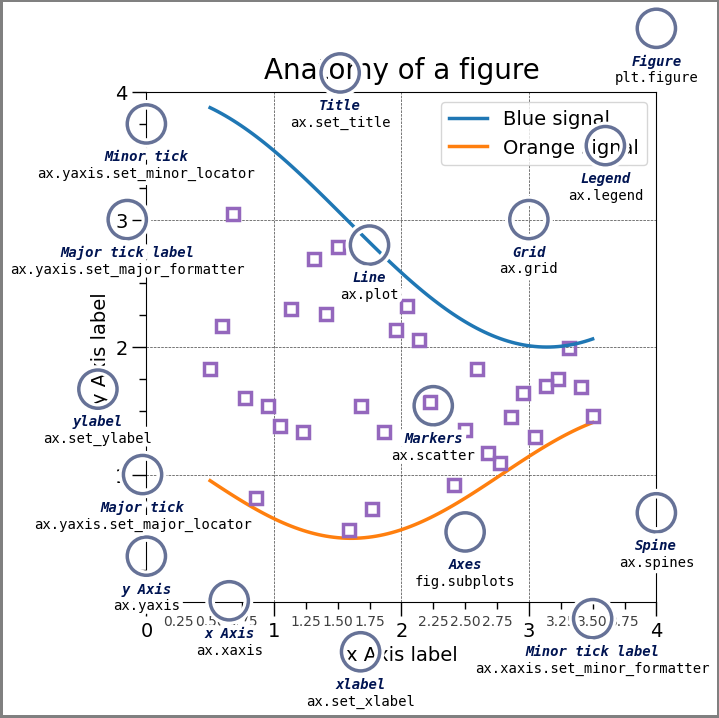

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.patheffects import withStroke
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

royal_blue = [0, 20/256, 82/256]


# make the figure

np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(7.5, 7.5))
ax = fig.add_axes([0.2, 0.17, 0.68, 0.7], aspect=1)

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter("{x:.2f}")

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0, length=10, labelsize=14)
ax.tick_params(which='minor', width=1.0, length=5, labelsize=10,
               labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c='C0', lw=2.5, label="Blue signal", zorder=10)
ax.plot(X, Y2, c='C1', lw=2.5, label="Orange signal")
ax.plot(X[::3], Y3[::3], linewidth=0, markersize=9,
        marker='s', markerfacecolor='none', markeredgecolor='C4',
        markeredgewidth=2.5)

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("x Axis label", fontsize=14)
ax.set_ylabel("y Axis label", fontsize=14)
ax.legend(loc="upper right", fontsize=14)


# Annotate the figure

def annotate(x, y, text, code):
    # Circle marker
    c = Circle((x, y), radius=0.15, clip_on=False, zorder=10, linewidth=2.5,
               edgecolor=royal_blue + [0.6], facecolor='none',
               path_effects=[withStroke(linewidth=7, foreground='white')])
    ax.add_artist(c)

    # use path_effects as a background for the texts
    # draw the path_effects and the colored text separately so that the
    # path_effects cannot clip other texts
    for path_effects in [[withStroke(linewidth=7, foreground='white')], []]:
        color = 'white' if path_effects else royal_blue
        ax.text(x, y-0.2, text, zorder=100,
                ha='center', va='top', weight='bold', color=color,
                style='italic', fontfamily='monospace',
                path_effects=path_effects)

        color = 'white' if path_effects else 'black'
        ax.text(x, y-0.33, code, zorder=100,
                ha='center', va='top', weight='normal', color=color,
                fontfamily='monospace', fontsize='medium',
                path_effects=path_effects)


annotate(3.5, -0.13, "Minor tick label", "ax.xaxis.set_minor_formatter")
annotate(-0.03, 1.0, "Major tick", "ax.yaxis.set_major_locator")
annotate(0.00, 3.75, "Minor tick", "ax.yaxis.set_minor_locator")
annotate(-0.15, 3.00, "Major tick label", "ax.yaxis.set_major_formatter")
annotate(1.68, -0.39, "xlabel", "ax.set_xlabel")
annotate(-0.38, 1.67, "ylabel", "ax.set_ylabel")
annotate(1.52, 4.15, "Title", "ax.set_title")
annotate(1.75, 2.80, "Line", "ax.plot")
annotate(2.25, 1.54, "Markers", "ax.scatter")
annotate(3.00, 3.00, "Grid", "ax.grid")
annotate(3.60, 3.58, "Legend", "ax.legend")
annotate(2.5, 0.55, "Axes", "fig.subplots")
annotate(4, 4.5, "Figure", "plt.figure")
annotate(0.65, 0.01, "x Axis", "ax.xaxis")
annotate(0, 0.36, "y Axis", "ax.yaxis")
annotate(4.0, 0.7, "Spine", "ax.spines")

# frame around figure
fig.patch.set(linewidth=4, edgecolor='0.5')
plt.show()

In [5]:
# backends disponibles para notebook
%matplotlib --list

Available matplotlib backends: ['agg', 'auto', 'cairo', 'gtk3', 'gtk3agg', 'gtk3cairo', 'gtk4', 'gtk4agg', 'gtk4cairo', 'inline', 'macosx', 'module://matplotlib_inline.backend_inline', 'nbagg', 'notebook', 'osx', 'pdf', 'pgf', 'ps', 'qt', 'qt5', 'qt5agg', 'qt5cairo', 'qt6', 'qtagg', 'qtcairo', 'svg', 'template', 'tk', 'tkagg', 'tkcairo', 'webagg', 'wx', 'wx', 'wxagg', 'wxcairo']


array([[84, 37, 74],
       [63, 80, 24],
       [58, 73, 63]], dtype=int32)

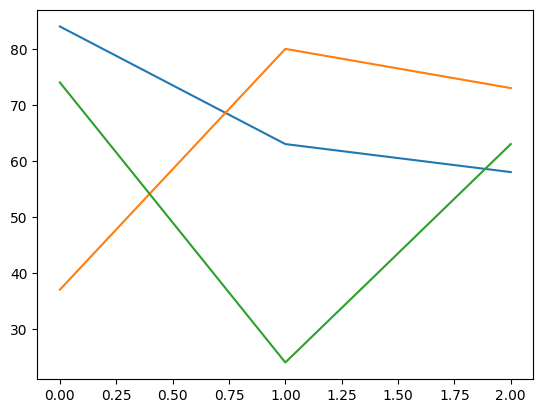

In [6]:
# Grafico de lineas
data = np.random.randint(100,size=(3,3))
display(data)
plt.plot(data) # creación del gráfico
plt.show()

array([[94,  1],
       [65, 43],
       [35, 12],
       [76,  1]], dtype=int32)

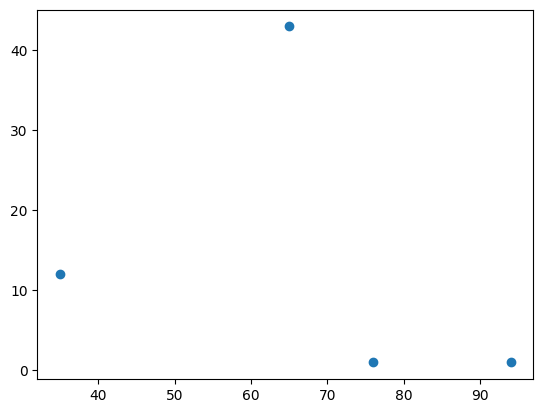

In [7]:
data = np.random.randint(100,size=(4,2))
display(data)
plt.scatter(data[:, 0], data[:, 1]) # creación del gráfico
plt.show() # comando que muestra los gráficos creados hasta el momento

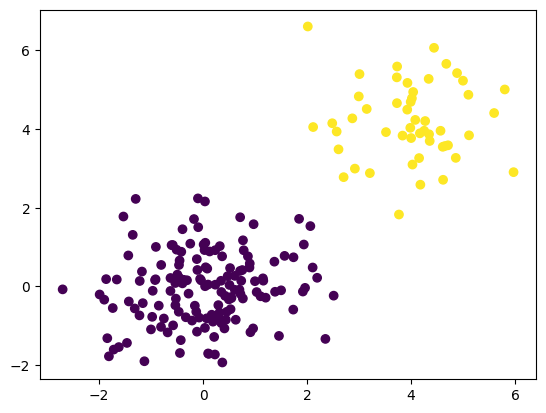

In [8]:
X = np.random.randn(200, 2)
X[:50] += 4
Y = np.zeros(200)
Y[:50] = 1
plt.scatter(X[:, 0], X[:, 1], c=Y)

In [9]:
# activar modo interactivo
# %matplotlib notebook
plt.ioff() # evitar que se sobreescriban los gráficos
%matplotlib inline
# para tener ventanas e interactivo
# %matplotlib tk

### Mosaico

(<Figure size 640x480 with 4 Axes>,
 {'a': <Axes: label='a'>,
  'b': <Axes: label='b'>,
  'c': <Axes: label='c'>,
  'd': <Axes: label='d'>})

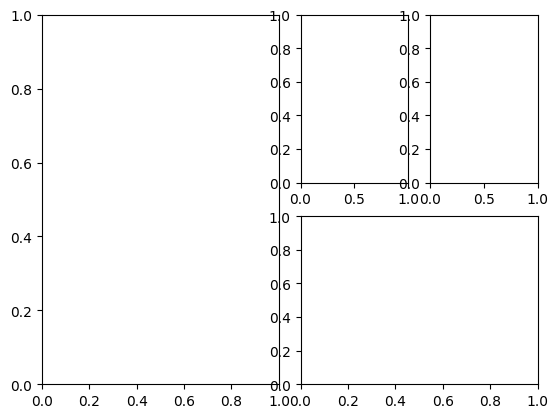

In [10]:
# crea subplots como axes
plt.subplot_mosaic('aabc\naadd')

### Crear una figura

<class 'numpy.ndarray'>
[<Axes: > <Axes: >]


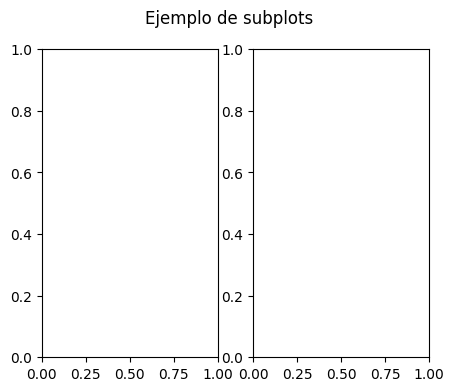

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(5, 4)) # crea una ndarray de 1x2 axes (o subplots)
print(type(axes))
print(axes)
fig.suptitle("Ejemplo de subplots")
plt.show()

### .plot()

Múltiples parámetros

```python
plt.plot(x, y, style, label, linewidth=1, alpha=1)
```

- 'style': cadena de texto con formato (color, tipo...) \[color\]\[marker\]\[line\]
- 'label': referencia para leyenda
- 'linewidth': brocha
- 'alpha': transparencia

Otros: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

### Parámetros estándar

| Color | Descripción |
|:------|:------------|
| b | blue |
| g | green |
| r | red |
| c | cyan |
| m | magenta |
| y | yellow |
| k | black |
| w | white |

| Marcador | Descripción |
|:------|:------------|
| . | point marker |
| , | pixel marker |
| o | circle marker |
| v | triangle_down marker |
| ^ | triangle_up marker |
| < | triangle_left marker |
| > | triangle_right marker |
| 1 | tri_down marker |
| 2 | tri_up marker |
| 3 | tri_left marker |
| 4 | tri_right marker |
| s | square marker |
| p | pentagon marker |
| * | star marker |
| h | hexagon1 marker |
| H | hexagon2 marker |
| + | plus marker |
| x | x marker |
| D | diamond marker |
| d | thin_diamond marker |
| | | vline marker |
| _ | hline marker |

| Línea | Descripción |
|:------|:------------|
| - | solid line style |
| -- | dashed line style |
| -. | dash-dot line style |
| : | dotted line style |



# Ejemplos con matplotlib

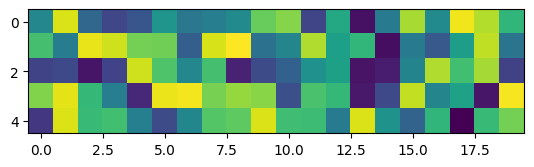

In [12]:
img = np.random.randint(0, 255, (5, 20))
plt.imshow(img)

In [13]:
(np.linalg.inv(x @ x.T) @ x).T.shape, y.shape
(np.linalg.inv(x.T @ x) @ x.T) @ y

NameError: name 'x' is not defined

Pendiente 1: [0.114224]
Pendiente 2: [0.12855011]
Intersección: [84.26057942]
[[ 0.114224  ]
 [ 0.12855011]
 [84.26057942]]


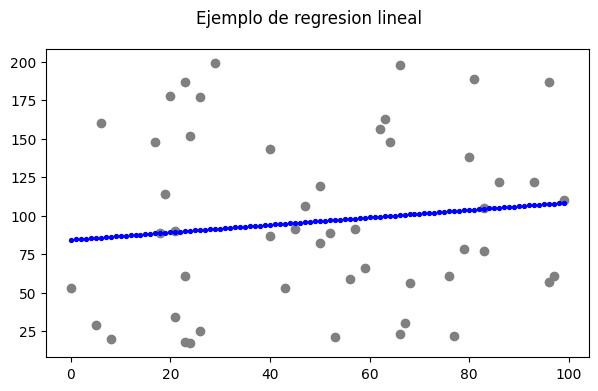

In [ ]:

# Datos de ejemplo
# x = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])
# y = np.array([2, 3, 5, 7, 11])
x = np.random.randint(0, 100, (50, 2))
y = np.random.randint(0, 200, (50, 1))

X = np.hstack([x, np.ones((x.shape[0], 1))])
coeficientes = np.linalg.lstsq(X, y, rcond=None)[0]
pendiente1, pendiente2, interseccion = coeficientes

print(f"Pendiente 1: {pendiente1}")
print(f"Pendiente 2: {pendiente2}")
print(f"Intersección: {interseccion}")
print((np.linalg.inv(X.T @ X) @ X.T) @ y)

x1 = np.linspace(x[:, 0].min(), x[:, 0].max(), 100)
y_rec = x1*pendiente1 + x1*pendiente2 + interseccion
fig, ax = plt.subplots(1, 1, figsize=(7, 4)) # crea una ndarray de 1x2 axes (o subplots)
# ax.scatter(x[:, 0], x[:, 1])
ax.scatter(x[:, 0], y, c='gray')
ax.scatter(x1, y_rec, c='blue', s=8)
fig.suptitle("Ejemplo de regresion lineal")
plt.show()

In [ ]:
x1 = np.linspace(x[:, 0].min(), x[:, 0].max(), 50)
y_rec = x1*pendiente1 + x1*pendiente2 + interseccion
# np.linspace?

# Seaborn

- Abstracción de matplotlib
- Facilidad de uso y personalización
- Excelente para exploración y visualización de relaciones entre variables

Viene con varios datasets predefinidos
https://github.com/mwaskom/seaborn-data

Documentación [oficial](https://seaborn.pydata.org/api.html)

## Ejemplos de uso de Seaborn




In [ ]:
tips = sns.load_dataset("tips")

NameError: name 'sns' is not defined

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(5, 5))
ax = sns.boxplot(x='day', y='tip', data=tips, ax=axs)
ax = sns.swarmplot(x="day", y="tip", data=tips, ax=ax)
plt.show()

In [ ]:
# Distribución bi-variable
sns.jointplot(x='total_bill', y='tip', hue='day', data=tips)
plt.show()

In [ ]:
axd = plt.figure(layout="constrained").subplot_mosaic(
    """
    AB
    CC
    """
)
axd['A'].scatter(tips['total_bill'], tips['tip'], s=10, 
           facecolors='none', edgecolors='b')
axd['A'].set_xlabel('bill')
axd['A'].set_ylabel('tip')
axd['C'].boxplot(tips['tip'], vert=False, labels=['day'])
axd['B'].boxplot(tips['total_bill'], vert=True, labels=['day'])
plt.show()

# Selección del barrio y aplicación de EDA

- Barrio: ARRANCAPINS; 9 estaciones
- Variable objetivo: count_out

## Distribución de las estaciones

In [ ]:
dfe = pd.read_csv('./data/interim/estaciones.csv')
dfe.tail()

In [ ]:
# Hacemos un plot de todo y analizamos problemas de la gráfica
# Uso de bicicletas por estación
fig, ax = plt.subplots(1, 1, figsize=(7, 4))
ax.plot(dfe['lon'], dfe['lat'])
# ax.scatter(dfe['lon'], dfe['lat'])
fig.suptitle("Uso de bicicletas por estación")
plt.show()

> ¿es adecuada la representación aplicada?

## Uso de bicis por estaciones

In [ ]:
dfe = pd.read_csv('./data/interim/usoestameteo.csv')
dfe.tail()

In [ ]:
# Hacemos un plot de todo y analizamos problemas de la gráfica
# Uso de bicicletas por estación
fig, ax = plt.subplots(1, 1, figsize=(7, 4))
ax.plot(dfe['fecha'], dfe['count_out'].abs())
fig.suptitle("Uso de bicicletas por estación")
plt.show()

> ¿Nos ayuda a conocer los datos la gráfica?

In [ ]:
# Seleccionamos para que haya una estación
dfe['fecha'] = pd.to_datetime(dfe['fecha'])
dfe.sort_values('fecha', ascending=True)
mask = dfe['address'] == 'Reina Doña María - Cádiz'
dfsel = dfe.loc[mask, :]
fig, ax = plt.subplots(1, 1, figsize=(7, 4))
ax.plot(dfsel['fecha'], dfsel['count_out'].abs()) # abs
fig.suptitle("Uso de bicicletas por estación")
plt.xticks(rotation=70)
plt.show()

## Uso de bicicletas por estación

In [ ]:
# Hacemos un plot de
# Uso de bicicletas por estación
fig, ax = plt.subplots(1, 1, figsize=(7, 4))
ax.plot(dfsel['fecha'], dfsel['count_out'])
fig.suptitle("Uso de bicicletas por estación")
plt.show()

In [ ]:
# uso de seaborn para ver distribución usando atributos categóricos
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
sns.lineplot(data=dfe, x='fecha', y='count_out', hue='address', ax=ax)
fig.suptitle("Uso de bicicletas por estación")
plt.show()

> ¿La gráfica representa la demanda? ¿hay que aplicar alguna transformación a los datos?

In [ ]:
dfe['count_out'] = dfe['count_out'].abs()
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
sns.lineplot(data=dfe, x='fecha', y='count_out', hue='address', ax=ax)
fig.suptitle("Uso de bicicletas por estación")
plt.show()

## Uso de bicis por Barrios

In [ ]:
dfb = pd.read_csv('./data/interim/usobarriosmeteo.csv')
dfb.fecha = pd.to_datetime(dfb.fecha)
dfb.sort_values('fecha', ascending=True)
dfb.tail()

In [ ]:
# Barrios
dfb['name'].value_counts(), dfb.shape
# dfb.shape, dfb.isna().sum()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
sns.lineplot(data=dfb, x='fecha', y='uso_bici', hue='name', ax=ax)
fig.suptitle("Uso de bicicletas por estación")
plt.show()

## Distribución espacial de las estaciones en el barrio

```sh
pip install geopandas
pip install pandas plotly
```

In [16]:
import geopandas as gpd

In [17]:
dfe = pd.read_csv('./data/interim/estaciones.csv')
dfe.tail()

,number,uso_bici,address,lat,lon,total,nombre,coddistrit,codbarrio
268,272,673,Vicente la Roda - Ingeniero Fausto Elio,39.480623,-0.332190,15,LA MALVA-ROSA,11,3
269,273,340,Moraira - Alta del Mar,39.450305,-0.333272,15,NATZARET,11,5
270,274,216,San Francisco de Paula - Castell de Pop,39.448070,-0.333188,15,NATZARET,11,5
271,275,418,Moreras - Rona de Nazaret,39.452305,-0.335065,20,LA PUNTA,10,6
272,276,1029,Veles e Vents,39.461975,-0.323765,20,EL GRAU,11,1


In [18]:
bar_df = gpd.read_file('./data/external/barris-barrios/barris-barrios.shp')
# Transformamos a un df de geopandas
gd_bike = gpd.GeoDataFrame(
    dfe, geometry=gpd.points_from_xy(dfe.lon, dfe.lat), crs="EPSG:4326"
)

In [19]:
#bar_df.loc[bar_df.coddistrit=='16', :]
bar_df.loc[bar_df['nombre']=='CAMPANAR']

,coddistbar,nombre,coddistrit,codbarrio,gis_gis_bar,geometry
12,041,CAMPANAR,4,1,9857367.5,"POLYGON ((-0.39012 39.48554, -0.38989 39.48522..."


> ¿se puede merjorar la visualización aplicando selección de los datos?

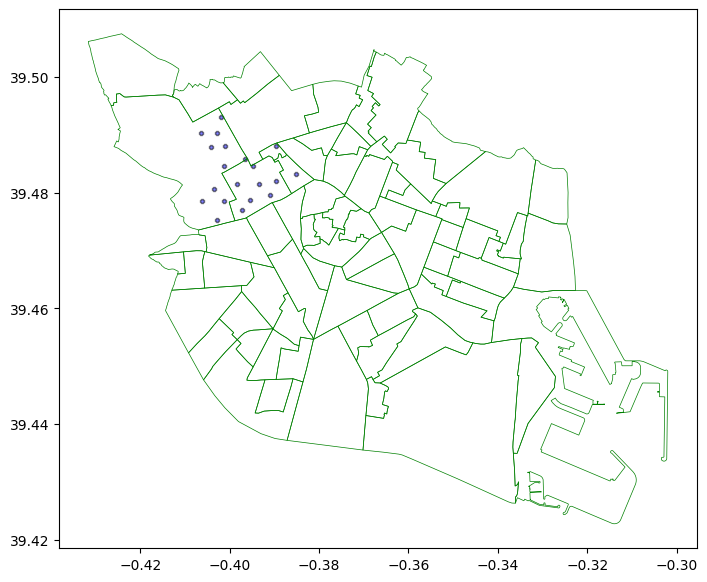

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
# .loc[~bar_df['coddistrit'].isin(['19', '17'])]
# ax = bar_df.loc[bar_df['nombre']=='ARRANCAPINS'].boundary.plot(ax=ax, color="green", linewidth=0.5)
# ax = bar_df.loc[bar_df['coddistrit']=='3'].boundary.plot(ax=ax, color="green", linewidth=0.5)
# ax = bar_df.boundary.plot(ax=ax, color="green", linewidth=0.5)
ax = bar_df.loc[~bar_df['coddistrit'].isin(['19', '17'])]\
            .boundary.plot(ax=ax, color="green", linewidth=0.5)
gd_bike.loc[gd_bike['coddistrit'] == 4, :]\
    .plot(ax=ax, color="blue", marker="P", 
          edgecolor='k', markersize=5, alpha= 0.5)
plt.show()

In [ ]:
import plotly.express as px

In [ ]:
# Crear el gráfico con Plotly Express
fig = px.scatter_geo(dfe,
                     lat='lat',
                     lon='lon',
                     hover_name='address', 
                     color='nombre',
                     hover_data=['nombre'],
                     projection='natural earth') #tipo de mapa

# Mostrar el gráfico
fig.show()


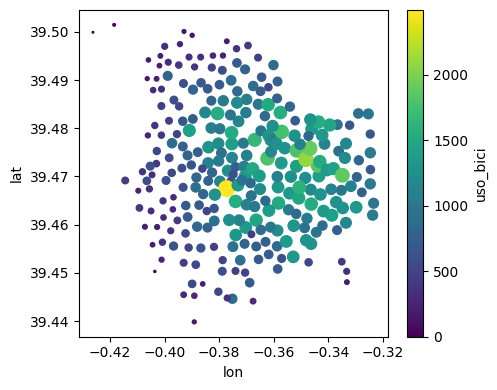

In [ ]:
x_feat, y_feat, size = 'lon', 'lat', 'uso_bici'
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax = ax.scatter(dfe[x_feat], dfe[y_feat], 
                s=(dfe[size]*0.05), c=dfe[size], cmap='viridis')
plt.ylabel(y_feat)
plt.xlabel(x_feat)
fig.tight_layout()
cbar = plt.colorbar(ax)
cbar.set_label(size)
plt.show()

# Uso de bicis por horas 

## Uso Promedio de Bicicletas por hora del Día

In [ ]:
dfsel = dfb.loc[dfb['name']=='RUSSAFA', :].copy()
dfsel['hora'] = dfsel['fecha'].dt.hour

In [ ]:
# distribución del uso de bicicletas por horas
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
sns.barplot(dfsel, x='hora', y='uso_bici')
plt.show()

## Uso de Bicicletas horas según si es fin de semana o no

In [ ]:
# Monday=0, Sunday=6
dfsel['dia_semana'] = dfsel['fecha'].dt.day_of_week
dfsel['findesemana'] = np.where(dfsel['dia_semana']>4, 1, 0)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
sns.barplot(dfsel, x='hora', y='uso_bici', hue='findesemana')
plt.show()

## Uso de Bicicletas por estación en función de si es fin de semana

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
sns.boxplot(data=dfsel, x="findesemana", y='uso_bici', hue='name')
plt.show()

## Exploración de variables meteorológicas con el uso de bicis

In [ ]:
dfb.columns

In [ ]:
sns.lineplot(data=dfsel, x="hr", y="uso_bici")
# sns.lineplot(data=dfb, x="tamax", y="uso_bici")

## Correlación entre variables

In [ ]:
ls_col = ['prec', 'vmax', 'vv', 'hr', 'ta', 'tpr', 'tamin', 'tamax', 'uso_bici']
correlation_matrix = dfb.loc[:, ls_col].corr()

In [ ]:
plt.figure(figsize=(10, 8))  # Ajusta el tamaño de la figura si es necesario
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Gráfica de Correlación')
plt.show()

# Conclusiones

- Se ha hecho un análisis de datos utilizado con diferentes técnicas de visualización de datos

